In [2]:
# compose the NN model
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>

Il Supervised Machine Learning prevede che dato un set di dati in input e output, si trovi la migliore funzione che leghi tali dati. A tale scopo si suddividono i dati in due sottoinsiemi: training e test.
I primi sono fondamentali per l'addestramento, i secondi sono utili per testare la funzione trovata. <br>
Tutto questo è realizzato tramite le reti neurali. <br>
Ciascuna è costituita da diversi livelli caratterizzati da diversi nodi.
Ogni nodo possiede diversi parametri che verranno ottimizzati in modo da minimizzare la funzione costo. 
Quest'ultimo processo è affidato al calcolatore nella fase di training. <br>
Per concludere si può testare la rete con i dati rimasti.

### Esercizio 1.1.

Una prima applicazione è la regressione lineare per la retta
$$
f(x)=2x+1
$$

In [ ]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

b_size=5

Vengono generati i dati di training e test, successivamente sporcati con un errore gaussiano.

In [ ]:
# generate training inputs
np.random.seed(0)

sigma = 1.5 # noise standard deviation, for the moment it is absent

x_train = np.random.uniform(-1, 1, 10000)
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters

x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_valid = np.random.normal(m * x_valid + b, sigma)

y_target = m * x_valid + b # ideal (target) linear function

# plot training and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True)
plt.show()

Un volta introdotti i dati, si costruisce la rete.
In questo caso, la struttura è sequenziale.
Creo un solo nodo senza funzione di attivazione poichè l'output di default è **wx+b**, dove **w** e **b** sono i parametri che si vuole minimizzare. Questo suggerisce che per tale problema basta un solo neurone. <br>
Si è scelto come ottimizzatore lo Stochastic gradient descent optimizer mentre la funzione costo è l'errore quadratico medio.

In [ ]:
model = tf.keras.Sequential()

model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer='Adadelta', loss='logcosh', metrics=['categorical_crossentropy'])

model.summary()

Adesso inizia il vero e proprio processo di apprendimento. Si dà in pasto alla rete i dati di training che serviranno per trovare il set di parametri che minimizzeranno la funzione costo. I dati verranno divisi in sottogruppi di dimensione batch_size e l'apprendimento ciclerà su tutti i dati un numero pari di volte alle epoche.

In [ ]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=b_size, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

In [ ]:
# return weights
model.get_weights()

In [ ]:
score = model.evaluate(x_valid, y_valid, batch_size=b_size, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

In [ ]:
score = model.evaluate(x_valid, y_target, batch_size=b_size, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Si nota che all'aumentare del numero delle epoche, la funzione costo diminuisce. Questo è dovuto al fatto che la rete continua ad imparare dai dati perfezionando il set di parametri dei nodi.

In [ ]:
# look into training history
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

La rete ha imparato ma adesso deve essere interrogata. <br>

In [ ]:
x_predicted = np.random.uniform(-1, 1, 100)
print("Input dataset shape: ", x_predicted.shape)
y_predicted = model.predict(x_predicted)
print("Output dataset shape: ", y_predicted.shape)


plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Si osserva che fissando il numero di epoche, la velocità dell'apprendimento dipende fortemente da batch_size.
Infatti, per grandi batch_size, l'apprendimento è rapido e la capacità predittiva scarsa. Nel caso opposto, l'apprendimento è molto più lento ma le capacità predittive sono indubbiamente migliori. Sporcando i dati con un errore abbastanza grande, la seconda opzione permette di ottenere un fit soddisfacente.

Con una rete cosiffatta ho provato a variare l'ottimizzatore osservando che con SGD, Adagrad, Adadelta, ADAM, ADAMAX si ottengono delle rette compatibili con quella target. Riporto le funzioni loss ottenute. I migliori sembrano essere gli ultimi tre.

- **SGD**
<img src="./Images/SGD(Loss).png" width="400">
- **Adagrad**
<img src="./Images/Adagrad(Loss).png" width="400">
- **Adadelta**
<img src="./Images/Adadelta(Loss).png" width="400">
- **ADAM**
<img src="./Images/ADAM(Loss).png" width="400">
- **ADAMAX**
<img src="./Images/ADAMAX(Loss).png" width="400">

Ora impongo Adadelta come ottimizzatore e vario la funzione costo.

- **Mean squared error**
<img src="./Images/Adadelta(mse,Loss).png" width="400">
- **Mean absolute error** 
<img src="./Images/Adadelta(mae,Loss).png" width="400">
- **Mean squared logarithmic error** 
<img src="./Images/Adadelta(msle,Loss).png" width="400">
- **Logcosh**
<img src="./Images/Adadelta(logcosh,Loss)pp.png" width="400">

La prima e l'ultima sono le migliori per l'ottimizzatore utilizzato.

### Exercise 11.2

Si vuole estendere il procedimento di cui sopra a funzioni più complesse come

$$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$.

Dopo diverse prove, la rete scelta è costituita da un neurone per il livello di input e output, cinque per il secondo e il penultimo, 15 per i 10 livelli nascosti. Ho fissato Adadelta come ottimizzatore, mse per la funzione costo ed ho provato a cambiare la funzione di attivazione.

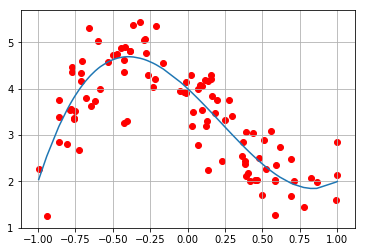

In [4]:
# target parameters of f(x) = 4-3x-2x^2+3x^3
a = 3 # slope
b = 2 # intersect
c = 3
d = 4# generate training inputs

b_size=10

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = d-c*x_valid-b*x_valid**2+a*pow(x_valid,3) # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(d-c*x_train-b*x_train**2+a*pow(x_train,3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(d-c*x_valid-b*x_valid**2+a*pow(x_valid,3), sigma)
                           
                          
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True)
plt.show()

In [6]:
model = tf.keras.Sequential()

model.add(Dense(1, input_shape=(1,)))
model.add(Dense(5,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(15,activation='softsign'))
model.add(Dense(5,activation='softsign'))
model.add(Dense(1,))

model.compile(optimizer='Adadelta', loss='mse', metrics=['mse'])


In [7]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=b_size, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 5000 samples, validate on 100 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
5000/5000 [==============================] - 5s 903us/sample - loss: 1.5509 - mean_squared_error: 1.5509 - val_loss: 0.5343 - val_mean_squared_error: 0.5343
Epoch 2/20
5000/5000 [==============================] - 2s 395us/sample - loss: 0.5180 - mean_squared_error: 0.5180 - val_loss: 0.5059 - val_mean_squared_error: 0.5059
Epoch 3/20
5000/5000 [==============================] - 2s 399us/sample - loss: 0.5160 - mean_squared_error: 0.5160 - val_loss: 0.5615 - val_mean_squared_error: 0.5615
Epoch 4/20
5000/5000 [==============================] - 2s 396us/sample - loss: 0.5139 - mean_squared_error: 0.5139 - val_loss: 0.5373 - val_mean_squared_error: 0.5373
Epoch 5/20
5000/5000 [==============================] - 2s 415us/sample - loss: 0.5066 - mean_squared_error: 0.5066 - val_loss: 0.4999 - val_mean_squared_error: 0.4999
Epoch 6/20
5000/5000 [==============================] - 2s 393us/

Si osserva una buona compatibilità con i dati ottenuti dalla funzione target all'interno del range fornito.
Ai bordi sembra che il modello ottenuto non funzioni molto bene; questo è dovuto al fatto che la rete non ha avuto abbastanza punti per imparare.
Si nota che fuori dal range il fit è completamente sbagliato. La rete non può intuire l'andamento della funzione oltre l'intervallo di addestramento.

In [8]:
# Test dei dati rimanenti.
score = model.evaluate(x_valid, y_valid, batch_size=b_size, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/100 [==============================] - 0s 164us/sample - loss: 0.2975 - mean_squared_error: 0.2975

Test loss: 0.2974585801362991
Test accuracy: 0.29745862


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=b_size, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/100 [==============================] - 0s 166us/sample - loss: 0.0055 - mean_squared_error: 0.0055

Test loss: 0.005476192274363712
Test accuracy: 0.005476192


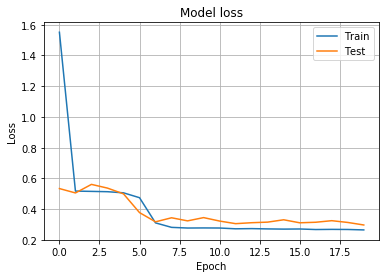

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
#plt.savefig("./Images2/Adadelta(softsign,loss).png")
plt.grid(True)
plt.show()

Input dataset shape:  (100,)
Input dataset shape:  (100, 1)


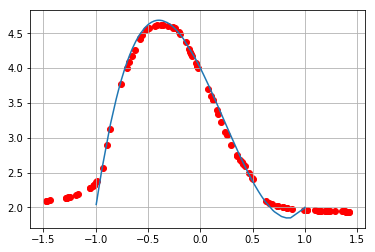

In [11]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
print("Input dataset shape: ", x_predicted.shape)
y_predicted = model.predict(x_predicted, batch_size=128)
print("Input dataset shape: ", y_predicted.shape)


plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
#plt.savefig("./Images2/Adadelta(softsign, curva).png")
plt.show()

Una rete caratterizzata da un livello con tanti nodi dà previsioni peggiori rispetto al caso in cui ho più livelli con più nodi. Se i livelli più interni fossero caratterizzati dallo stesso numero di nodi, il sistema sarebbe più performante.

Provo a cambiare la funzione di attivazione. Riporto le varie immagini per fare un confronto.

- **Relu, sigmoid, softmax**: non danno previsioni corrette.
<img src="./Images3/Adadelta(relu, curva).png" width="400">
- **Selu, elu, tanh, softsign**.
<img src="./Images3/Adadelta(elu, curva).png" width="400">

### Exercise 11.3
  
Ripetere lo stesso procedimento per la funzione $f(x,y) = \sin(x^2+y^2)$ nel range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [12]:
def f(x,y):
    return np.sin(x**2 + y**2)

In [13]:
np.random.seed(1)

x_train = np.random.uniform(-1.5, 1.5, 1000)
y_train = np.random.uniform(-1.5, 1.5, 1000)

x_valid = np.random.uniform(-1.5, 1.5, 100)
y_valid = np.random.uniform(-1.5, 1.5, 100)

z_target = f(x_valid, y_valid) 

sigma = 0.3
z_train = np.random.normal(f(x_train,y_train), sigma) 
z_valid = np.random.normal(f(x_valid,y_valid), sigma)


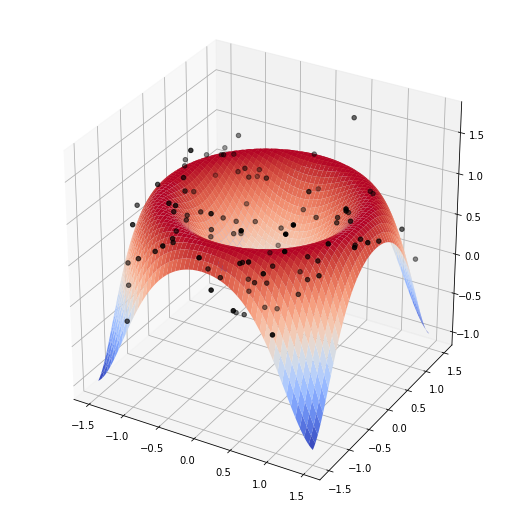

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)

x = np.linspace(-1.5, 1.5, 1000)
y = np.linspace(-1.5, 1.5, 1000)
x, y = np.meshgrid(x, y) #prodotto cartesiano.
z = f(x,y)

ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=2)
ax.scatter(x_valid, y_valid, z_valid, color='black')
ax.grid(True)
plt.show()

Per costruire la rete ho pensato di creare molti livelli con lo stesso numero di neuroni tutti con la funzione di attivazione relu. 
Ho precedentemente verificato che danno buone capacità predettive e si potrà osservare che è vero anche in questo caso.

In [15]:
model = tf.keras.Sequential()
model.add(Dense(5, input_shape=(2,)))
model.add(Dense(10,activation='elu'))
model.add(Dense(15,activation='elu'))
model.add(Dense(20,activation='elu'))
model.add(Dense(20,activation='elu'))
model.add(Dense(20,activation='elu'))
model.add(Dense(20,activation='elu'))
model.add(Dense(20,activation='elu'))
model.add(Dense(20,activation='elu'))
model.add(Dense(20,activation='elu'))
model.add(Dense(20,activation='elu'))
model.add(Dense(15,activation='elu'))
model.add(Dense(5,activation='elu'))
model.add(Dense(1,activation='elu'))
           
model.compile(optimizer='Adadelta', loss='mae', metrics=['mae'])

In [16]:
data_train = np.transpose([x_train, y_train])
data_valid = np.transpose([x_valid, y_valid])

history = model.fit(x=data_train, y=z_train, 
          batch_size=5, epochs=200,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(data_valid, z_valid))

Train on 1000 samples, validate on 100 samples
Epoch 1/200
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.4262 - mean_absolute_error: 0.4262 - val_loss: 0.3529 - val_mean_absolute_error: 0.3529
Epoch 2/200
1000/1000 [==============================] - 1s 893us/sample - loss: 0.4072 - mean_absolute_error: 0.4072 - val_loss: 0.3425 - val_mean_absolute_error: 0.3425
Epoch 3/200
1000/1000 [==============================] - 1s 956us/sample - loss: 0.4017 - mean_absolute_error: 0.4017 - val_loss: 0.3195 - val_mean_absolute_error: 0.3195
Epoch 4/200
1000/1000 [==============================] - 1s 932us/sample - loss: 0.3871 - mean_absolute_error: 0.3871 - val_loss: 0.2899 - val_mean_absolute_error: 0.2899
Epoch 5/200
1000/1000 [==============================] - 1s 873us/sample - loss: 0.3539 - mean_absolute_error: 0.3539 - val_loss: 0.2703 - val_mean_absolute_error: 0.2703
Epoch 6/200
1000/1000 [==============================] - 1s 919us/sample - loss: 0.3316 - mean_absol

Epoch 96/200
1000/1000 [==============================] - 1s 884us/sample - loss: 0.2519 - mean_absolute_error: 0.2519 - val_loss: 0.2457 - val_mean_absolute_error: 0.2457
Epoch 97/200
1000/1000 [==============================] - 1s 861us/sample - loss: 0.2542 - mean_absolute_error: 0.2542 - val_loss: 0.2645 - val_mean_absolute_error: 0.2645
Epoch 98/200
1000/1000 [==============================] - 1s 853us/sample - loss: 0.2524 - mean_absolute_error: 0.2524 - val_loss: 0.2636 - val_mean_absolute_error: 0.2636
Epoch 99/200
1000/1000 [==============================] - 1s 875us/sample - loss: 0.2535 - mean_absolute_error: 0.2535 - val_loss: 0.2436 - val_mean_absolute_error: 0.2436
Epoch 100/200
1000/1000 [==============================] - 1s 899us/sample - loss: 0.2519 - mean_absolute_error: 0.2519 - val_loss: 0.2459 - val_mean_absolute_error: 0.2459
Epoch 101/200
1000/1000 [==============================] - 1s 862us/sample - loss: 0.2584 - mean_absolute_error: 0.2584 - val_loss: 0.2429 

1000/1000 [==============================] - 1s 901us/sample - loss: 0.2454 - mean_absolute_error: 0.2454 - val_loss: 0.2573 - val_mean_absolute_error: 0.2573
Epoch 191/200
1000/1000 [==============================] - 1s 825us/sample - loss: 0.2478 - mean_absolute_error: 0.2478 - val_loss: 0.2507 - val_mean_absolute_error: 0.2507
Epoch 192/200
1000/1000 [==============================] - 1s 877us/sample - loss: 0.2493 - mean_absolute_error: 0.2493 - val_loss: 0.2515 - val_mean_absolute_error: 0.2515
Epoch 193/200
1000/1000 [==============================] - 1s 871us/sample - loss: 0.2464 - mean_absolute_error: 0.2464 - val_loss: 0.2494 - val_mean_absolute_error: 0.2494
Epoch 194/200
1000/1000 [==============================] - 1s 861us/sample - loss: 0.2469 - mean_absolute_error: 0.2469 - val_loss: 0.2585 - val_mean_absolute_error: 0.2585
Epoch 195/200
1000/1000 [==============================] - 1s 861us/sample - loss: 0.2473 - mean_absolute_error: 0.2473 - val_loss: 0.2473 - val_mean

In [17]:
score = model.evaluate(data_valid, z_target, batch_size=5, verbose=1)

print()
print('Test loss:', score[0])
print('Test Mean Square Error:', score[1])

100/100 [==============================] - 0s 312us/sample - loss: 0.0822 - mean_absolute_error: 0.0822

Test loss: 0.08220151998102665
Test Mean Square Error: 0.08220152


In [18]:
score = model.evaluate(data_valid, z_valid, batch_size=5, verbose=1)

print()
print('Test loss:', score[0])
print('Test Mean Square Error:', score[1])

100/100 [==============================] - 0s 350us/sample - loss: 0.2588 - mean_absolute_error: 0.2588

Test loss: 0.25883213579654696
Test Mean Square Error: 0.2588321


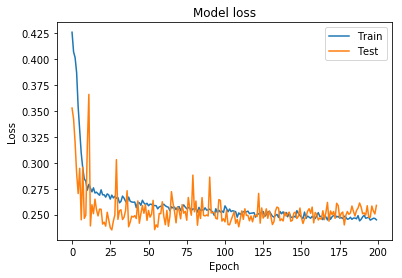

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

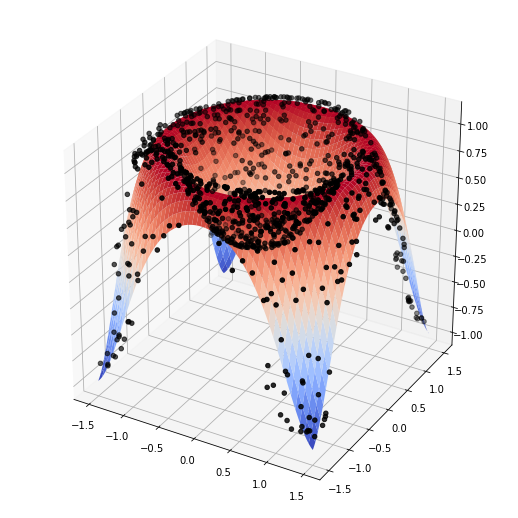

In [20]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)

x_predicted = np.random.uniform(-1.5, 1.5, 1000)
y_predicted = np.random.uniform(-1.5, 1.5, 1000)
data_predicted = np.transpose([x_predicted, y_predicted])
z_predicted = model.predict(data_predicted)

ax.scatter(x_predicted, y_predicted, z_predicted, color='black')
ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=2)
plt.show()

Si osserva una buona compatibilità con i risultati teorici.